In [5]:
# add ../code6 to the system path so it is found by Python -- this is not needed if you install the module
import sys
sys.path.append('..')
from matplotlib import pyplot as plt

from code6 import Seidel,  PSF, OLPF, PixelAperture, convpsf, MTF
%matplotlib inline

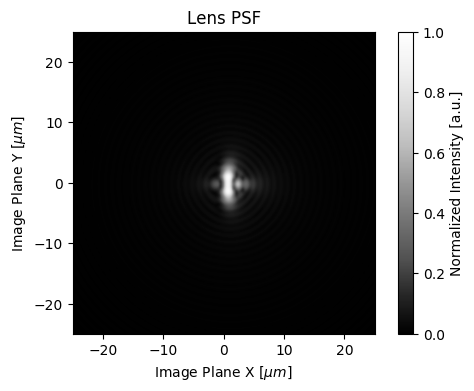

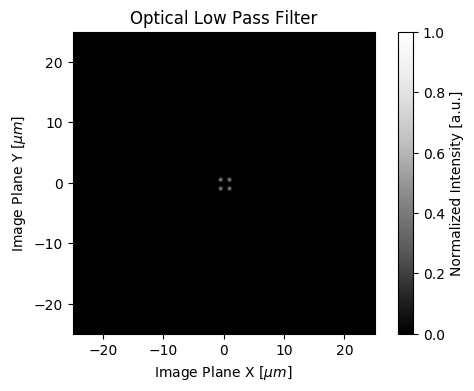

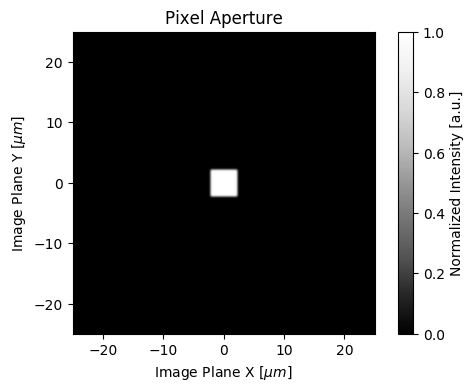

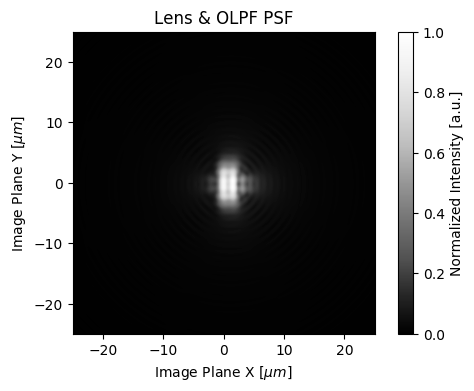

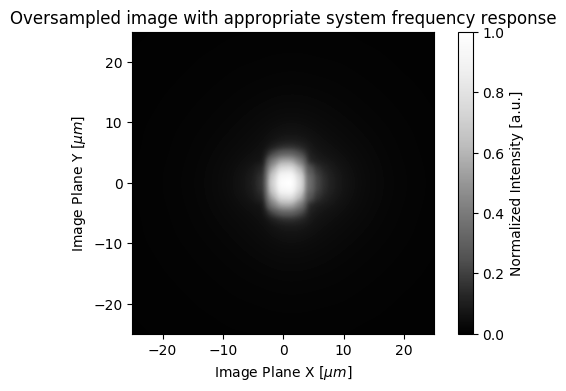

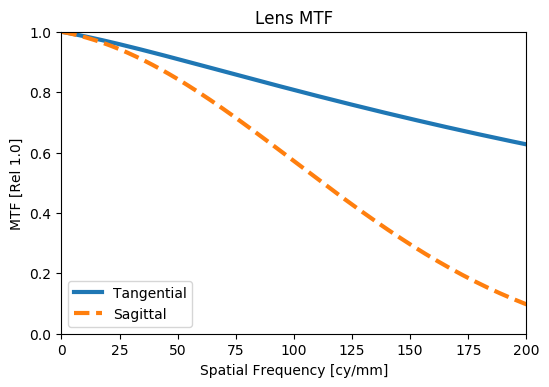

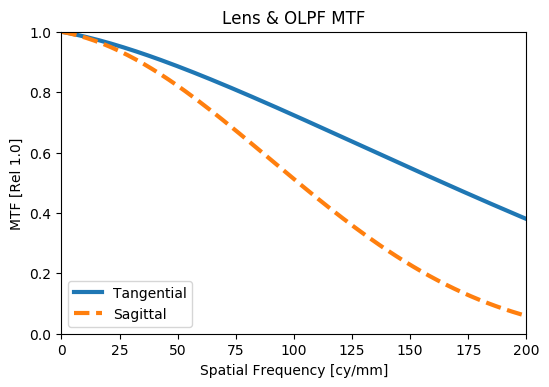

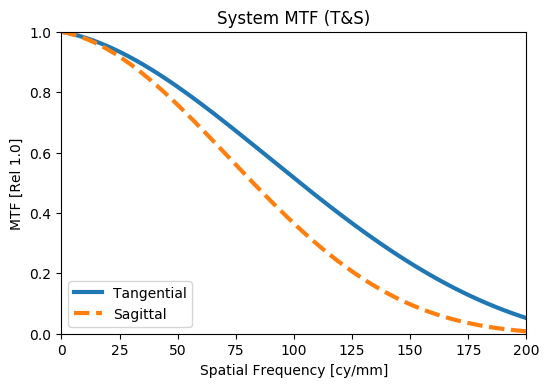

In [8]:
# generate a pupil with some Seidel aberration content,
# densely sampled to align with the req. enforced by the frequency response of the pixel aperture edge
pup = Seidel(W040=0.25, W020=-0.65, W222=0.4, W131=0.2, epd=25, samples=512)

# create a PSF from the pupil
psf1 = PSF.from_pupil(pup, efl=50)

# make an OLPF suitable for a 5 micron pixel pitch camera
olpf = OLPF(width_x=5*0.375, sample_spacing=psf1.sample_spacing, samples=psf1.samples)

# make a pixel
pix = PixelAperture(size=5, sample_spacing=psf1.sample_spacing, samples=psf1.samples)

# create a series of PSFs that are the convolution of our components
psf2 = convpsf(psf1, olpf)
psf3 = convpsf(psf2, pix)

# generate system-level MTFs
mtf1 = MTF.from_psf(psf1)
mtf2 = MTF.from_psf(psf2)
mtf3 = MTF.from_psf(psf3)

# show some results
psf1.plot2d()
plt.title('Lens PSF')

olpf.plot2d()
plt.title('Optical Low Pass Filter')

pix.plot2d()
plt.title('Pixel Aperture')

psf2.plot2d()
plt.title('Lens & OLPF PSF')

psf3.plot2d()
plt.title('Oversampled image with appropriate system frequency response')

mtf1.plot_tan_sag()
plt.title('Lens MTF')

mtf2.plot_tan_sag()
plt.title('Lens & OLPF MTF')

mtf3.plot_tan_sag()
plt.title('System MTF (T&S)')